In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

In [2]:
estadao = "base_aplicacao_resultado/rotulado_tratado_links_estadao_resgatados.csv"
folha_1 = "base_aplicacao_resultado/rotulado_tratado_links_folha_e_agora_sem_rotulos_resgatados.csv"
folha_2 = "base_aplicacao_resultado/rotulado_tratado_links_folha_e_agora_sem_rotulos_resgatar_novamente_resgatados.csv"
correio = "base_aplicacao_resultado/rotulado_tratado_links_correio_do_povo_organizado_paragrafos_resgatados.csv"

In [3]:
df1 = pd.read_csv(folha_1)
df1.shape

(2709, 7)

In [4]:
df2 = pd.read_csv(folha_2)
df2.shape

(103, 7)

In [5]:
df = pd.concat([df1, df2], axis = 0)
df.shape

(2812, 7)

In [6]:
df.head()

Unnamed: 0   ano                                               link  \
0           0  2001  http://www1.folha.uol.com.br/fsp/ilustrad/fq04...   
1           1  2001  http://www1.folha.uol.com.br/folha/mundo/ult94...   
2           2  2001  http://www1.folha.uol.com.br/fsp/ilustrad/fq10...   
3           3  2001  http://www1.folha.uol.com.br/folha/ciencia/ult...   
4           4  2001  http://www1.folha.uol.com.br/folha/ciencia/ult...   

                               paragrafos_resgatados  \
0  ['É uma idiotice. Mas é o preço do sucesso dos...   
1  ['Os transtornos psíquicos, inclusive as manif...   
2  ['O artista plástico Ubirajara Ferreira Braga ...   
3  ['Um grupo de pesquisadores israelenses descob...   
4  ['Um grupo de pesquisadores israelenses descob...   

                              paragrafos_tratados_sw  \
0  idiotice preço sucesso antidepressivos transfo...   
1  transtornos psíquicos manifestações depressiva...   
2  artista plástico ubirajara ferreira braga come...   
3  pesquisadores israelenses descobriu gene servi...   
4  descoberta trazer benefício pacientes reduziri...   

                  paragrafos_tratados_sw_vetorizados  metaforico_pred  
0  [[ 1.52341600e+00 -7.87311998e-01 -1.90507002e...                0  
1  [[-3.08092985e-01  8.02221035e-01  1.68601102e...                0  
2  [[ 3.43677802e+00  1.09151603e+00  3.13246397e...                0  
3  [[ 1.61639995e-01  1.52443696e+00  7.48734023e...                0  
4  [[-0.791387    1.49077798  2.14812099  0.59115...                0

In [7]:
df["paragrafos_tratados_sw"] = df["paragrafos_tratados_sw"].apply(str)

In [8]:
df["metaforico"] = df["metaforico_pred"].apply(lambda x: "sim" if x == 1 else 'nao')

In [9]:
df.metaforico.value_counts(normalize = True)

nao    0.759957
sim    0.240043
Name: metaforico, dtype: float64

In [10]:
grp = df.groupby(["ano", "metaforico"], as_index = False).size()
grp_ano = df.groupby(["ano"], as_index = False).size().rename(columns = {"size": "qtd_ano"})
grp1 = grp.merge(grp_ano, on = "ano", how = "left")
grp1["percentual"] = (grp1["size"] / grp1["qtd_ano"]) * 100

grp_prop = grp.pivot_table(index = ["ano"], columns = ["metaforico"], values = ["size"]).reset_index()
grp_prop.columns = ["ano", "nao", "sim"]
grp_prop["proporcao"] = grp_prop["sim"] / grp_prop["nao"]

grp2 = grp1.merge(grp_prop[["ano","proporcao"]], on = "ano", how = "left")

grp2.head()

ano metaforico  size  qtd_ano  percentual  proporcao
0  2001        nao   154      213   72.300469   0.383117
1  2001        sim    59      213   27.699531   0.383117
2  2002        nao   163      215   75.813953   0.319018
3  2002        sim    52      215   24.186047   0.319018
4  2003        nao    80      128   62.500000   0.600000

# Gráficos em Linhas

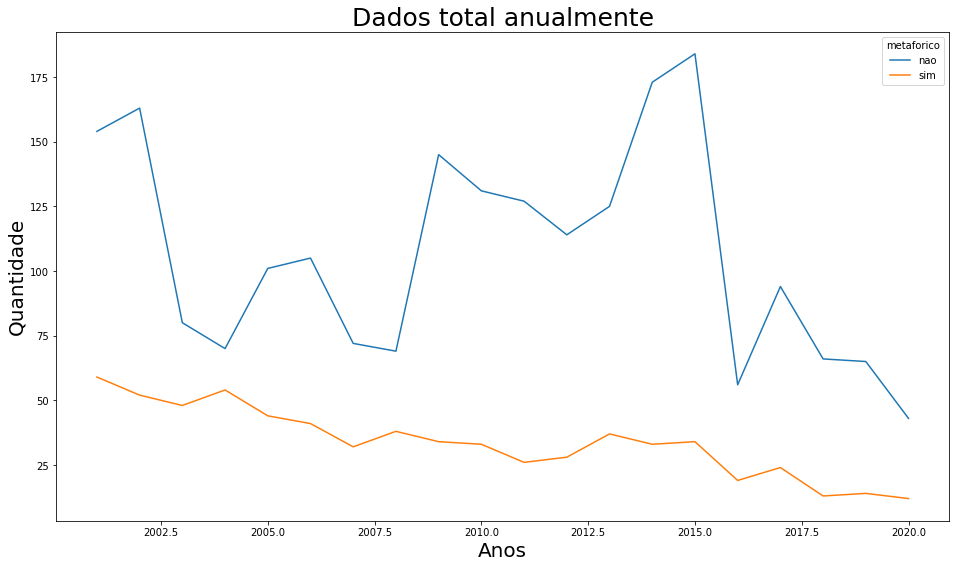

In [11]:
plt.figure(figsize = (16, 9))
ax = sns.lineplot(x = "ano", y = "size", data = grp2, hue = "metaforico")
ax.set_title("Dados total anualmente", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Quantidade", fontsize = 20)
ax = ax

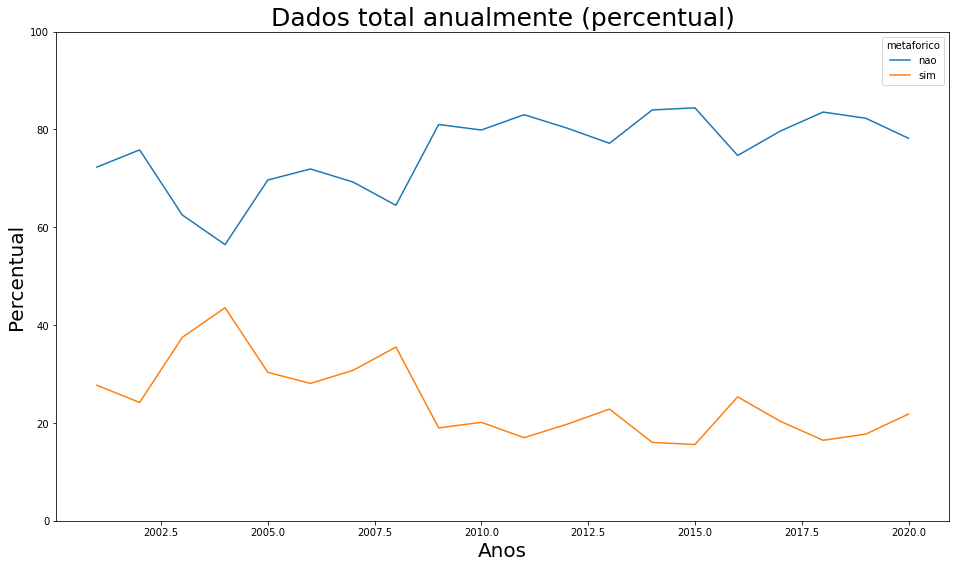

In [12]:
plt.figure(figsize = (16, 9))
ax = sns.lineplot(x = "ano", y = "percentual", data = grp2, hue = "metaforico")
ax.set_title("Dados total anualmente (percentual)", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Percentual", fontsize = 20)
ax.set_ylim(0, 100)
ax = ax

# Gráficos em barras

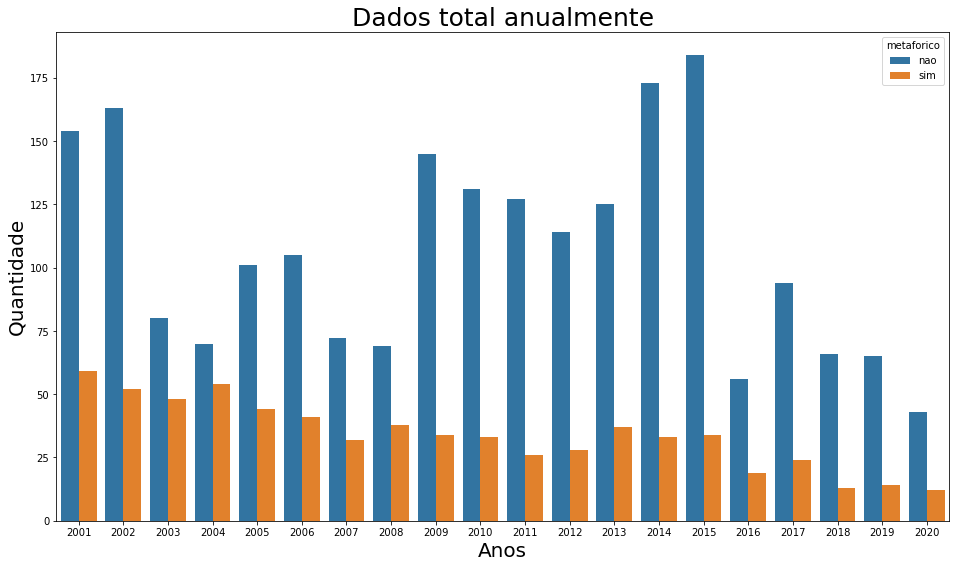

In [13]:
plt.figure(figsize= (16, 9))
ax = sns.barplot(x = "ano", y = "size", hue = "metaforico", data = grp2)
ax.set_title("Dados total anualmente", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Quantidade", fontsize = 20)
ax = ax

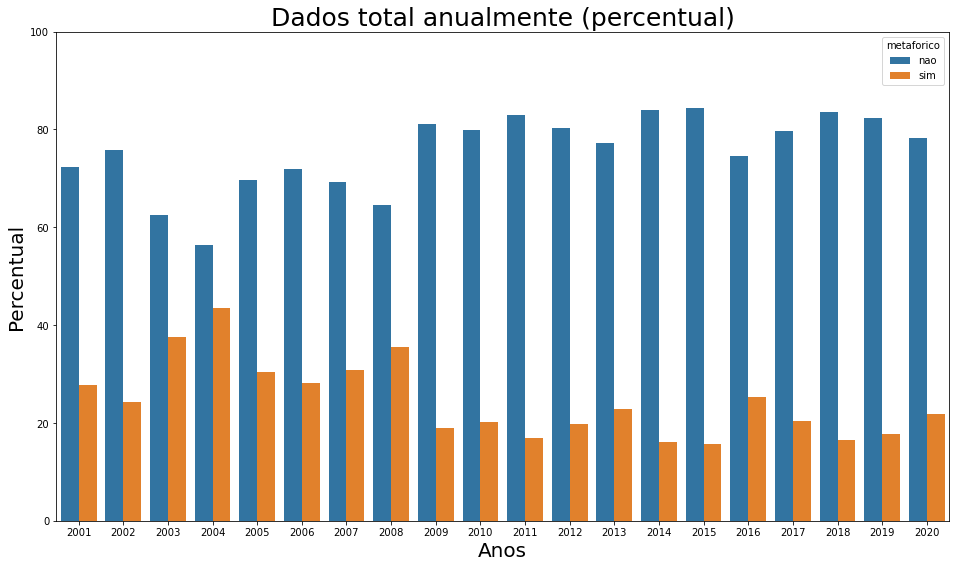

In [14]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x = "ano", y = "percentual", data = grp2, hue = "metaforico")
ax.set_title("Dados total anualmente (percentual)", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Percentual", fontsize = 20)
ax.set_ylim(0, 100)
ax = ax

# Nuvens de palavras completas 

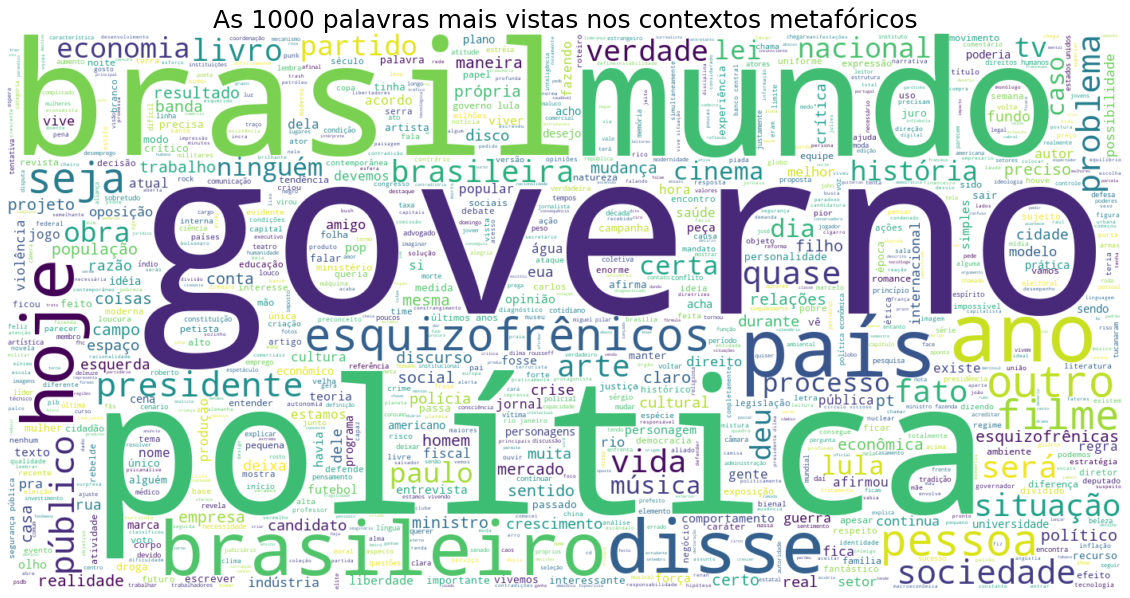

In [15]:
wc = WordCloud(background_color='white', max_words=1000, width=1400, height=700)

bloco = ' '.join(df.query("metaforico == 'sim'").paragrafos_tratados_sw) # Passar o bloco é padrão
lista = bloco.split(" ") # assim posso remover algumas palavras

palavras_removidas = ["esquizofrênico", "esquizofrênica", "esquizofrenico","esquizofrenica", "há", "esquizofrenia", "são"]

lista_sem_especificas = [palavra for palavra in lista if palavra not in palavras_removidas]
bloco_sem_especificas = " ".join(lista_sem_especificas)

wc.generate(bloco_sem_especificas)
# wc.generate(bloco)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("As 1000 palavras mais vistas nos contextos metafóricos", fontsize = 25)
plt.show()

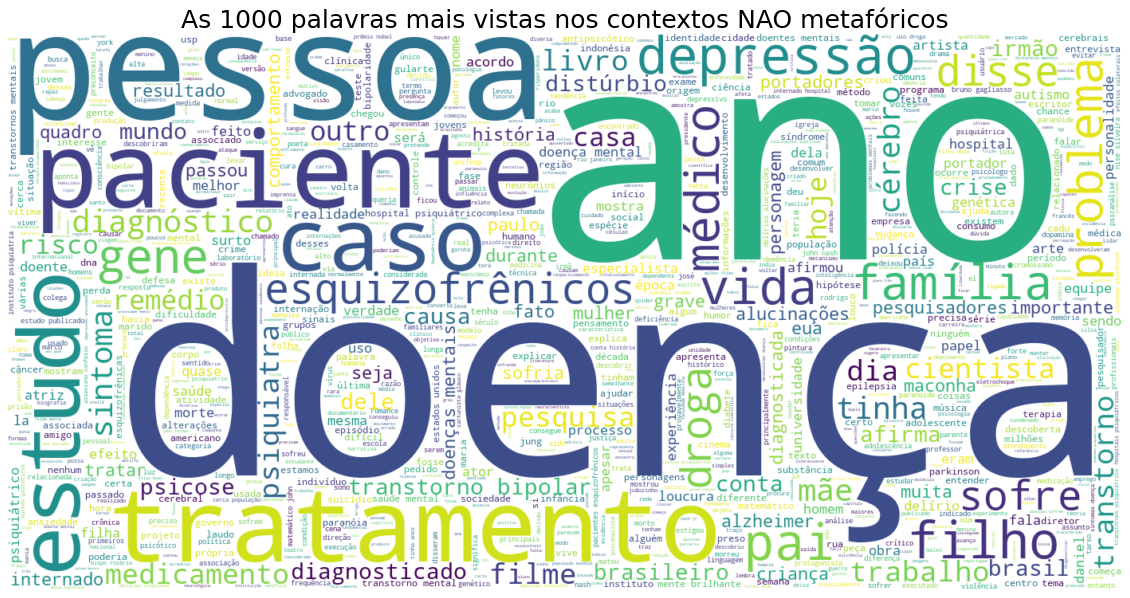

In [16]:
wc = WordCloud(background_color='white', max_words=1000, width=1400, height=700)

bloco = ' '.join(df.query("metaforico == 'nao'").paragrafos_tratados_sw) # Passar o bloco é padrão
lista = bloco.split(" ") # assim posso remover algumas palavras

palavras_removidas = ["esquizofrênico", "esquizofrênica", "esquizofrenico","esquizofrenica", "há", "esquizofrenia", "são"]

lista_sem_especificas = [palavra for palavra in lista if palavra not in palavras_removidas]
bloco_sem_especificas = " ".join(lista_sem_especificas)

wc.generate(bloco_sem_especificas)
# wc.generate(bloco)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("As 1000 palavras mais vistas nos contextos NAO metafóricos", fontsize = 25)
plt.show()

# Nuvens de palavras por ano

In [17]:
def nuvem_palavras(ano, num):
    bloco = ' '.join(df.query(f"ano == {ano} and metaforico == '{num}'").paragrafos_tratados_sw) # Passar o bloco é padrão
    lista = ' '.join(df.query(f"ano == {ano} and metaforico == '{num}'").paragrafos_tratados_sw).split(" ") # assim posso remover algumas palavras
    
    palavras_removidas = ["esquizofrênico", "esquizofrênica", "esquizofrenico","esquizofrenica", "há", "esquizofrenia", "são"]
    
    lista_sem_especificas = [palavra for palavra in lista if palavra not in palavras_removidas]
    bloco_sem_especificas = " ".join(lista_sem_especificas)
    
    wc.generate(bloco_sem_especificas)
    # wc.generate(bloco)
    plt.figure(figsize=(20,20))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    if num == 'nao':
        plt.title(f"{ano} | As 1000 palavras mais vistas nos contextos CLASSIFICADO COMO NAO metafóricos ({ano})", fontsize = 25)
        plt.show()
    else: 
        plt.title(f"{ano} | As 1000 palavras mais vistas nos contextos CLASSIFICADO COMO metafóricos ({ano})", fontsize = 25)
        plt.show()

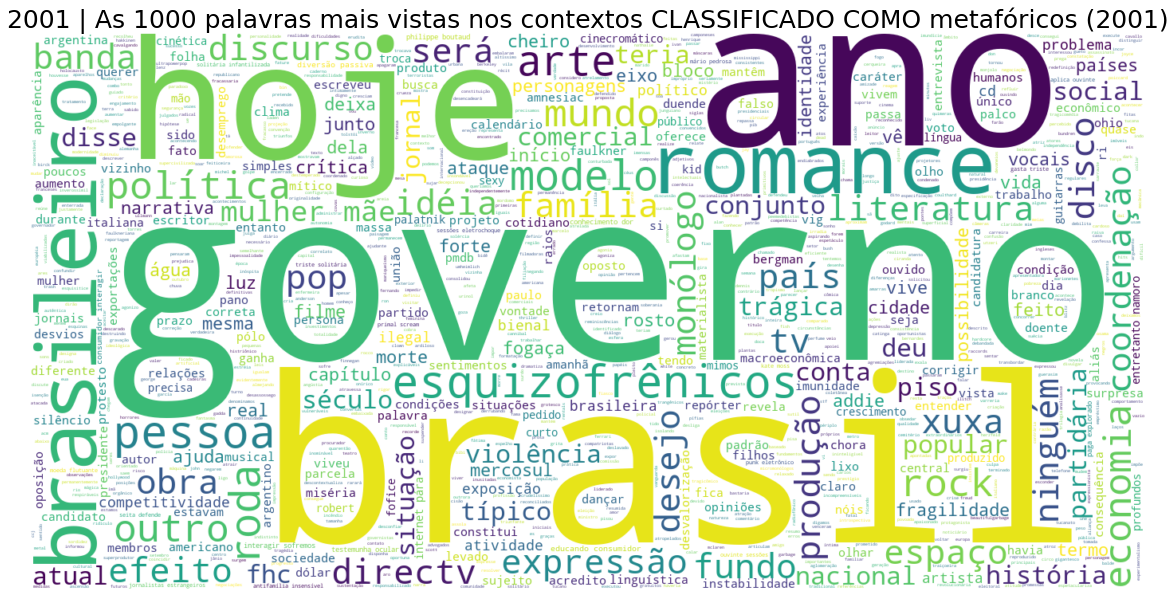

In [18]:
nuvem_palavras("2001", "sim")

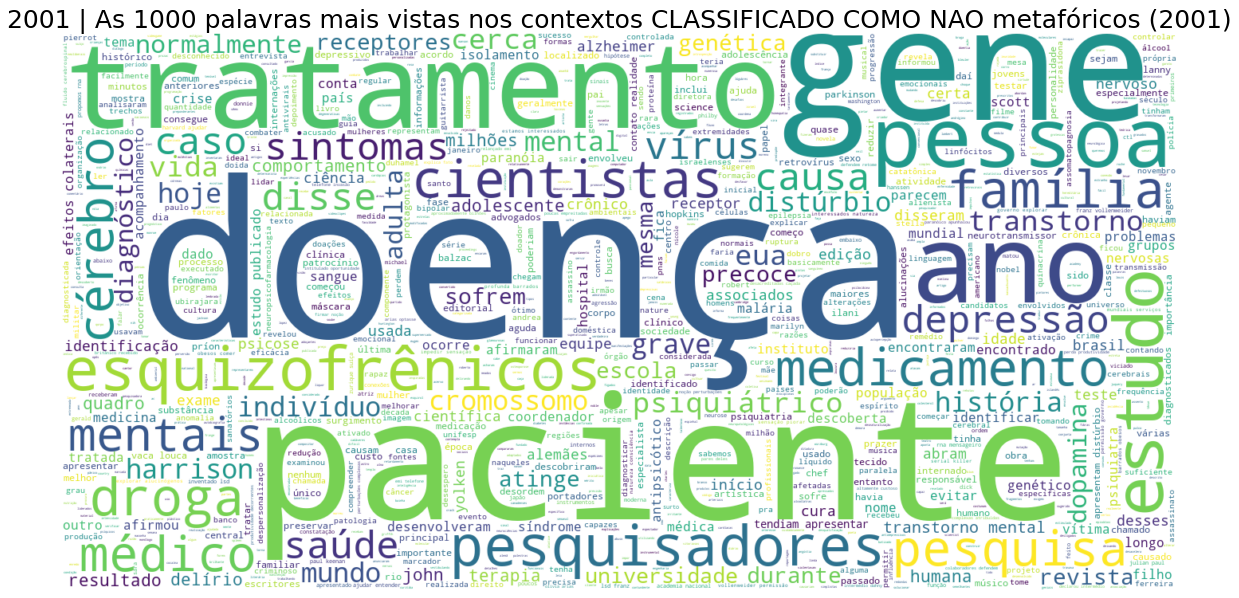

In [19]:
nuvem_palavras("2001", "nao")

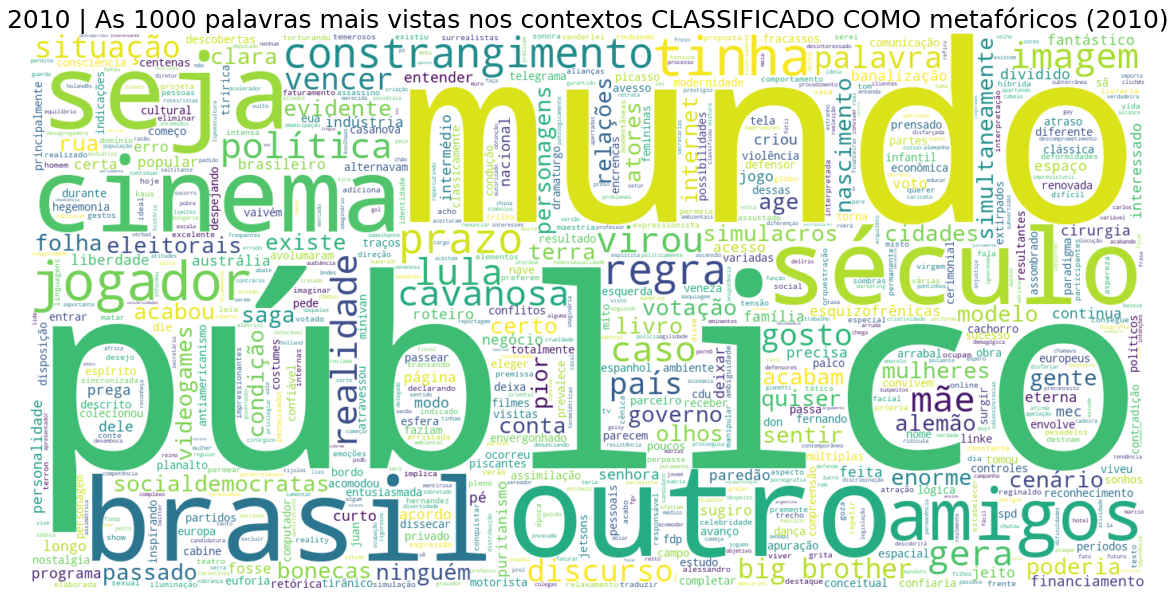

In [20]:
nuvem_palavras("2010", "sim")

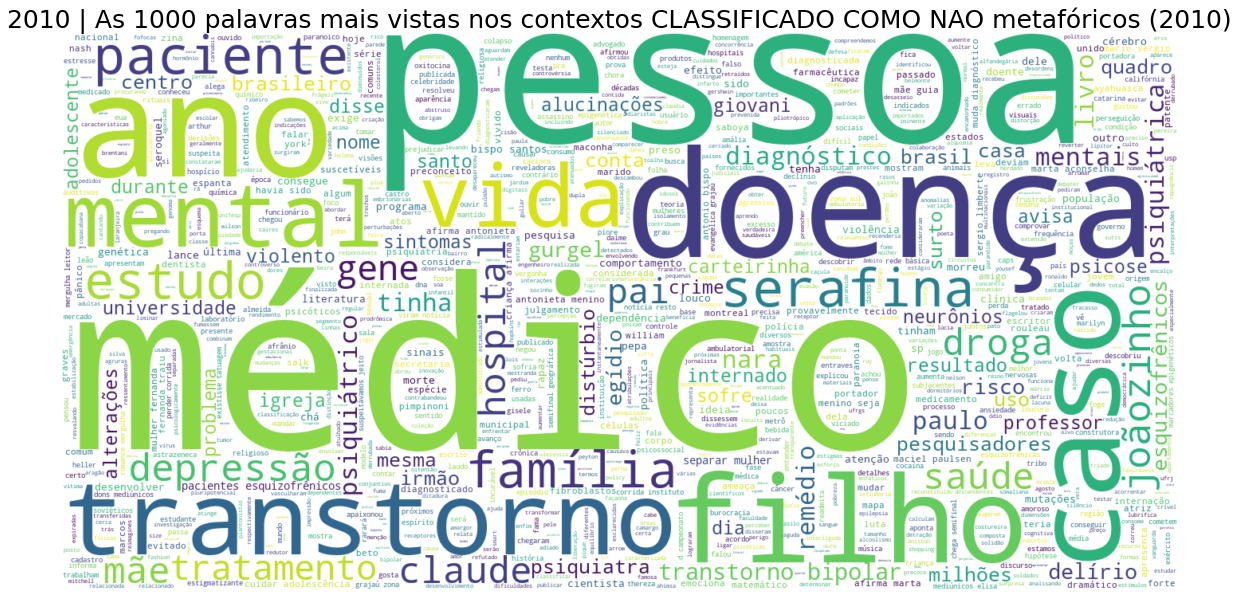

In [21]:
nuvem_palavras("2010", "nao")

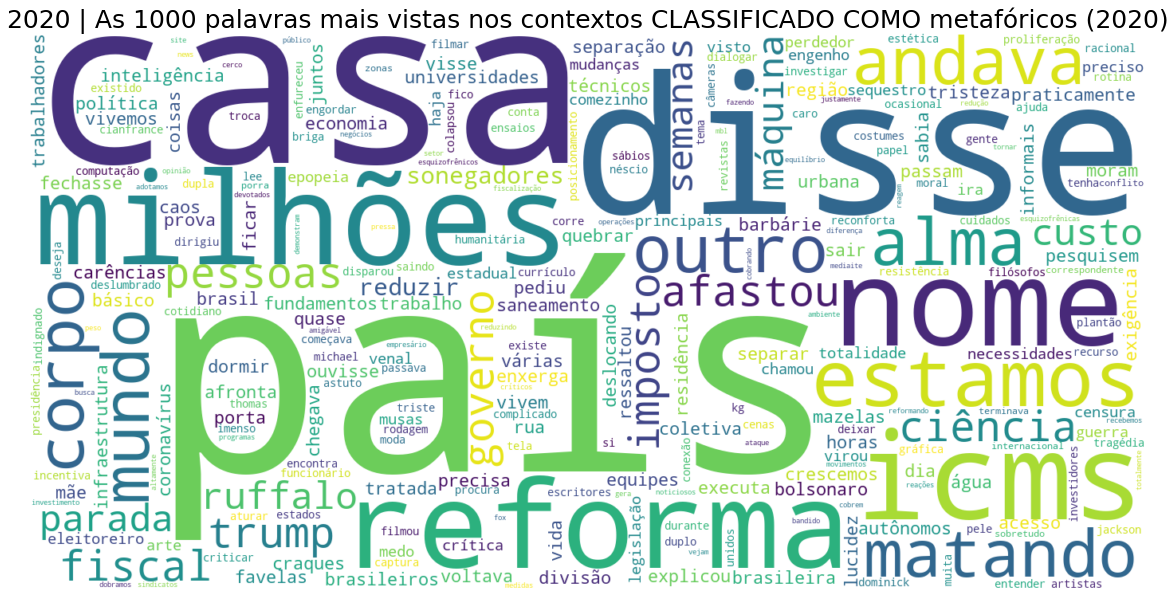

In [22]:
nuvem_palavras("2020", "sim")

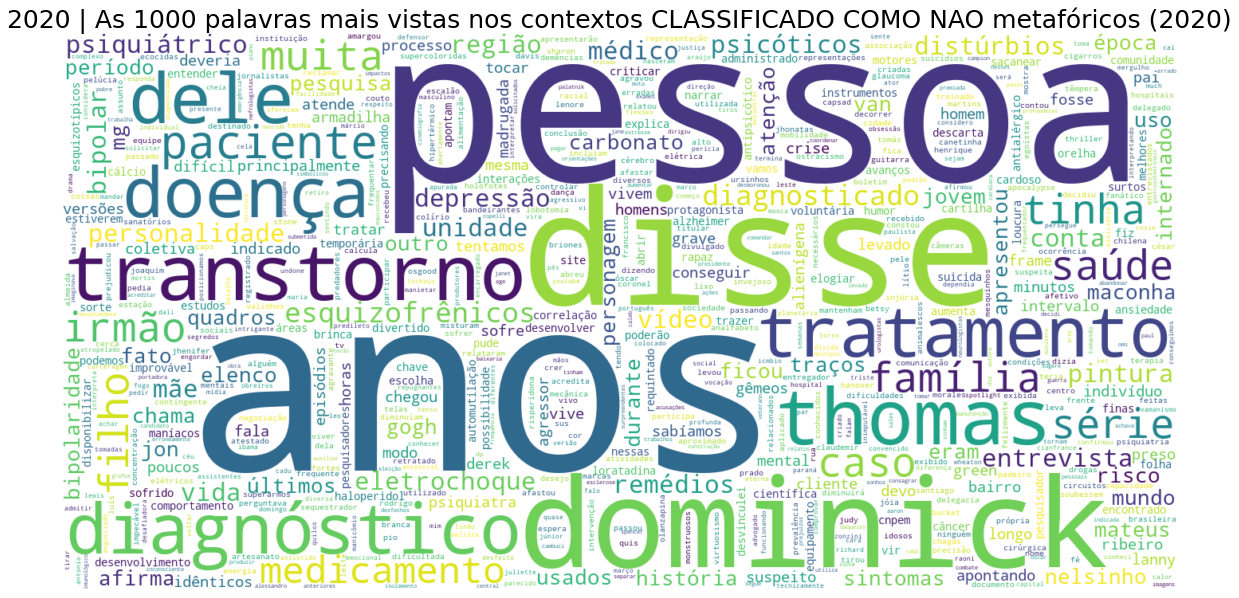

In [23]:
nuvem_palavras("2020", "nao")

In [24]:
!jupyter nbconvert --to html --no-input analise_folha.ipynb

[NbConvertApp] Converting notebook analise_folha.ipynb to html
[NbConvertApp] Writing 9116592 bytes to analise_folha.html
